# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 15.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
388714,0.6860,0.2979,0.7959,0.2026,0.0806,0.1465,1.2378,0.6934,0.2759,0.3857,9,9,15,15
379172,0.3638,0.0073,0.0049,0.0024,0.0049,0.0171,0.2124,0.4517,0.0024,0.1123,0,0,0,0
388758,0.6348,0.1709,0.6494,0.2271,0.0488,0.0708,0.7495,0.7446,0.7178,0.2100,9,9,15,15
406462,0.6055,0.2100,0.1001,0.0220,0.0244,0.0659,0.4102,1.6187,0.0342,0.1392,8,8,17,17
291239,0.3271,0.0024,0.0024,0.0024,0.0024,0.0024,0.0439,0.2856,0.0024,0.0220,0,0,0,0


In [3]:
raw_data.shape

(478193, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478193 entries, 0 to 478192
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          478193 non-null  float64
 1   Emg2          478193 non-null  float64
 2   Emg3          478193 non-null  float64
 3   Emg4          478193 non-null  float64
 4   Emg5          478193 non-null  float64
 5   Emg6          478193 non-null  float64
 6   Emg7          478193 non-null  float64
 7   Emg8          478193 non-null  float64
 8   Emg9          478193 non-null  float64
 9   Emg10         478193 non-null  float64
 10  repetition    478193 non-null  int64  
 11  rerepetition  478193 non-null  int64  
 12  stimulus      478193 non-null  int64  
 13  restimulus    478193 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 51.1 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000
mean,0.501572,0.151599,0.169478,0.056115,0.023732,0.065833,0.550883,0.589846,0.165808,0.288571,3.102268,2.235315,5.525838,4.065892
std,0.428903,0.262973,0.299034,0.130464,0.044097,0.111559,0.646651,0.384964,0.348622,0.376059,3.475910,3.261604,6.578251,6.221459
min,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217300,0.002400,0.002400,0.002400,0.002400,0.004900,0.124500,0.329600,0.002400,0.051300,0.000000,0.000000,0.000000,0.000000
50%,0.410200,0.036600,0.019500,0.002400,0.002400,0.024400,0.327100,0.485800,0.002400,0.136700,2.000000,0.000000,3.000000,0.000000
75%,0.649400,0.178200,0.214800,0.051300,0.022000,0.075700,0.727500,0.737300,0.183100,0.383300,6.000000,4.000000,10.000000,7.000000
max,4.663100,3.642600,4.658200,3.710900,0.874000,1.750500,4.663100,4.199200,4.658200,3.754900,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     207859
8      15597
7      15587
12     15585
4      15574
6      15559
9      15555
2      15554
5      15547
11     15531
10     15526
3      15520
1      15515
14     10404
13     10399
17     10398
15     10361
16     10323
19      5929
21      5198
18      5193
20      5161
22      5161
23      5157
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

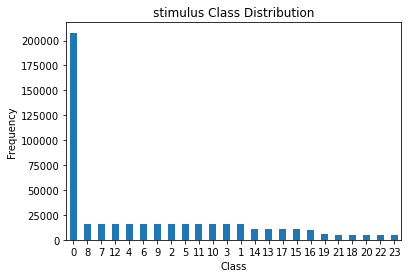

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
294515,0.5200,0.0195,0.0049,0.0024,0.0024,0.0049,0.1172,0.4712,0.0024,0.0171,0,0,0,0
246195,0.6689,0.0537,0.0952,0.0610,0.0464,0.2075,1.1133,0.6958,0.1392,0.6909,1,1,1,1
326872,0.7422,0.2246,0.0879,0.1392,0.0317,0.0537,0.4810,0.8350,0.0439,0.2271,6,6,9,9
332869,0.4004,0.0024,0.0024,0.0024,0.0024,0.0122,0.4883,0.4980,0.0024,0.0757,0,0,0,0
158765,1.1255,0.8813,0.6226,0.0732,0.0415,0.1245,1.3818,1.0986,0.5518,0.9546,8,8,7,7


In [12]:
raw_data.shape

(395231, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395231 entries, 0 to 478192
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          395231 non-null  float64
 1   Emg2          395231 non-null  float64
 2   Emg3          395231 non-null  float64
 3   Emg4          395231 non-null  float64
 4   Emg5          395231 non-null  float64
 5   Emg6          395231 non-null  float64
 6   Emg7          395231 non-null  float64
 7   Emg8          395231 non-null  float64
 8   Emg9          395231 non-null  float64
 9   Emg10         395231 non-null  float64
 10  repetition    395231 non-null  int64  
 11  rerepetition  395231 non-null  int64  
 12  stimulus      395231 non-null  int64  
 13  restimulus    395231 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 53.3 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 81.47810796108644


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     40780
           1       0.74      0.75      0.74      2304
           2       0.63      0.65      0.64      1970
           3       0.73      0.72      0.72      2146
           4       0.70      0.71      0.70      2172
           5       0.65      0.67      0.66      1921
           6       0.75      0.75      0.75      1967
           7       0.66      0.66      0.66      2377
           8       0.69      0.69      0.69      2261
           9       0.67      0.67      0.67      2141
          10       0.70      0.68      0.69      2305
          11       0.68      0.69      0.68      2182
          12       0.68      0.68      0.68      2233
          13       0.63      0.68      0.66      1299
          14       0.67      0.66      0.67      1612
          15       0.64      0.66      0.65      1578
          16       0.71      0.68      0.69      1547
 

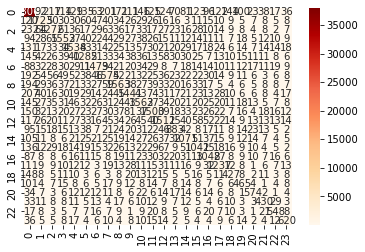

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.3947018862195908
MSE: 15.848963275013599
RMSE: 3.981075642965554


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.815381651746097
Recall Score :  0.8147810796108644
f1_score :  0.8150311238374977


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 87.86418206889573


Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     40780
           1       0.85      0.87      0.86      2304
           2       0.79      0.73      0.76      1970
           3       0.86      0.81      0.83      2146
           4       0.82      0.80      0.81      2172
           5       0.83      0.78      0.80      1921
           6       0.86      0.83      0.85      1967
           7       0.82      0.74      0.78      2377
           8       0.86      0.75      0.80      2261
           9       0.85      0.72      0.78      2141
          10       0.86      0.76      0.81      2305
          11       0.85      0.79      0.82      2182
          12       0.84      0.79      0.81      2233
          13       0.85      0.74      0.79      1299
          14       0.83      0.71      0.77      1612
          15       0.80      0.74      0.77      1578
          16       0.88      0.76      0.82      1547
 

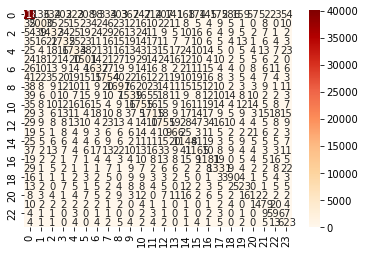

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.9741925689779498
MSE: 11.516502840082483
RMSE: 3.3935973302798437


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8762077941894045
Recall Score :  0.8786418206889572
f1_score :  0.8749255874518872


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 92.51204979316103


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     40780
           1       0.93      0.88      0.91      2304
           2       0.93      0.81      0.87      1970
           3       0.92      0.87      0.90      2146
           4       0.91      0.86      0.89      2172
           5       0.91      0.84      0.87      1921
           6       0.96      0.89      0.92      1967
           7       0.89      0.83      0.86      2377
           8       0.90      0.84      0.87      2261
           9       0.94      0.81      0.87      2141
          10       0.92      0.88      0.90      2305
          11       0.94      0.87      0.90      2182
          12       0.91      0.87      0.89      2233
          13       0.93      0.85      0.89      1299
          14       0.93      0.84      0.88      1612
          15       0.89      0.85      0.87      1578
          16       0.93      0.87      0.90      1547
 

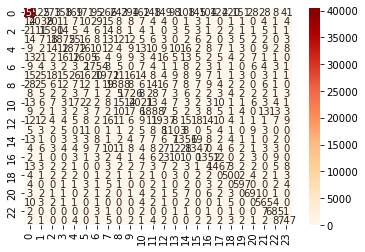

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.6081824737181677
MSE: 7.2863612787329055
RMSE: 2.699326078622756


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9252926896093167
Recall Score :  0.9251204979316103
f1_score :  0.9235064722422182


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

C:\Users\nafem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:20:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 84.42445633610383


Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     40780
           1       0.79      0.75      0.77      2304
           2       0.72      0.59      0.65      1970
           3       0.79      0.74      0.76      2146
           4       0.77      0.68      0.72      2172
           5       0.73      0.66      0.69      1921
           6       0.87      0.74      0.80      1967
           7       0.68      0.64      0.66      2377
           8       0.72      0.68      0.70      2261
           9       0.80      0.64      0.71      2141
          10       0.75      0.72      0.74      2305
          11       0.79      0.70      0.74      2182
          12       0.70      0.71      0.70      2233
          13       0.77      0.68      0.72      1299
          14       0.78      0.67      0.72      1612
          15       0.70      0.70      0.70      1578
          16       0.78      0.74      0.76      1547
 

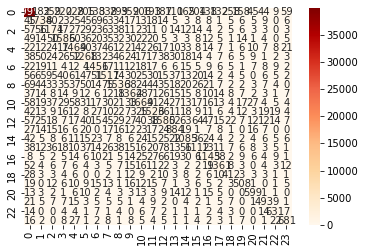

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1.1402709780257316
MSE: 12.812187685807178
RMSE: 3.579411639614418


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8388199824190258
Recall Score :  0.8442445633610384
f1_score :  0.8395112989601907


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 93.37862284463674


Classification report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     40780
           1       0.94      0.90      0.92      2304
           2       0.96      0.82      0.88      1970
           3       0.94      0.88      0.91      2146
           4       0.94      0.87      0.91      2172
           5       0.95      0.85      0.90      1921
           6       0.97      0.91      0.94      1967
           7       0.92      0.84      0.88      2377
           8       0.94      0.85      0.89      2261
           9       0.96      0.82      0.88      2141
          10       0.95      0.90      0.92      2305
          11       0.96      0.89      0.92      2182
          12       0.93      0.88      0.91      2233
          13       0.96      0.87      0.91      1299
          14       0.95      0.86      0.90      1612
          15       0.91      0.87      0.89      1578
          16       0.95      0.89      0.92      1547
 

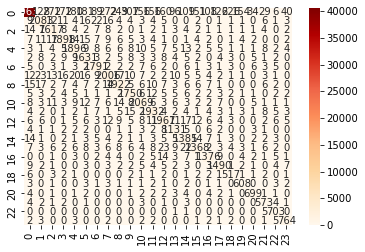

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.561906207699217
MSE: 6.907067946917657
RMSE: 2.6281301236654278


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9348868382336095
Recall Score :  0.9337862284463674
f1_score :  0.9324606601418759
